# Jacob White Final Project

In [5]:
import pandas as pd
import numpy as np
import os
import sklearn

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

from IPython.display import Image
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.datasets import make_classification;

/Users/jacobwhite/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Import data

In [24]:
df = pd.read_pickle('/Users/jacobwhite/development/data/metaTables_july/metaClaims_invMod.pickle')

### Exploratory Data Analysis

In [7]:
df.shape

(2522038, 306)

In [8]:
df.describe

<bound method NDFrame.describe of         accepted_date accident_type adjustment_reason  \
0                 NaT           NaN               NaN   
1                 NaT           NaN               NaN   
2                 NaT           NaN               NaN   
3                 NaT           NaN               NaN   
4                 NaT           NaN               NaN   
5                 NaT           NaN               NaN   
6                 NaT           NaN               NaN   
7                 NaT           NaN               NaN   
8                 NaT           NaN               NaN   
9                 NaT           NaN               NaN   
...               ...           ...               ...   
2522028           NaT           NaN               NaN   
2522029           NaT           NaN               NaN   
2522030           NaT           NaN               NaN   
2522031           NaT           NaN               NaN   
2522032           NaT           NaN               NaN 

In [9]:
df.isnull().sum()

accepted_date                    1704261
accident_type                    2516992
adjustment_reason                2429127
adjustment_reason_description    2465413
adjustment_reason_id             2465413
adjustment_type                  2522038
admission_date                   2483729
allowed_amount                         0
alt_procedure_code               2518056
amount_awp_ingredient_cost       1977613
                                  ...   
unit_type                         951394
update_type                      1969146
updated_by_base_user_id           299673
value_codes                       951295
workflow_queue_desc              1688523
workflow_queue_id                1688523
external_reportable                    0
metaclaim_id                           0
paid_date                         434777
has_corresponding_claim                0
Length: 306, dtype: int64

In [10]:
df.isnull().sum().sum()

383711056

In [11]:
df.dtypes

accepted_date                    datetime64[ns]
accident_type                            object
adjustment_reason                        object
adjustment_reason_description            object
adjustment_reason_id                     object
adjustment_type                         float64
admission_date                   datetime64[ns]
allowed_amount                          float64
alt_procedure_code                       object
amount_awp_ingredient_cost              float64
                                      ...      
unit_type                                object
update_type                              object
updated_by_base_user_id                 float64
value_codes                              object
workflow_queue_desc                      object
workflow_queue_id                        object
external_reportable                        bool
metaclaim_id                             object
paid_date                                object
has_corresponding_claim                 

In [12]:
df.head()

,accepted_date,accident_type,adjustment_reason,adjustment_reason_description,adjustment_reason_id,...,workflow_queue_id,external_reportable,metaclaim_id,paid_date,has_corresponding_claim
0,NaT,NaN,NaN,NaN,NaN,...,NaN,True,M_99036_99115,NaN,False
1,NaT,NaN,NaN,NaN,NaN,...,NaN,True,M_539318_623141,2016-09-30,True
2,NaT,NaN,NaN,NaN,NaN,...,NaN,True,M_534922_617617,2016-09-23,True
3,NaT,NaN,NaN,NaN,NaN,...,NaN,True,M_518445_592291,NaN,False
4,NaT,NaN,NaN,7,7,...,NaN,True,M_516064_589830,NaN,False


For this analysis - I am interested in what factors drive cost. Cost is defined in the column "Benefit Amount". This data set has 305 possible explanatory variables over more than 2 million rows. Benefit Amount will be the response variable for this analysis.

### Analysis

In [13]:
df[df['serviceYearMonth'] == '201606']

,accepted_date,accident_type,adjustment_reason,adjustment_reason_description,adjustment_reason_id,...,workflow_queue_id,external_reportable,metaclaim_id,paid_date,has_corresponding_claim
4,NaT,NaN,NaN,7,7,...,NaN,True,M_516064_589830,NaN,False
5,NaT,NaN,NaN,7,7,...,NaN,True,M_516064_589799,NaN,False
6,NaT,NaN,NaN,7,7,...,NaN,True,M_516064_589798,NaN,False
7,NaT,NaN,NaN,7,7,...,NaN,True,M_516064_589797,NaN,False
8,NaT,NaN,NaN,7,7,...,NaN,True,M_516064_589796,NaN,False
9,NaT,NaN,NaN,7,7,...,NaN,True,M_516064_589795,NaN,False
10,NaT,NaN,NaN,7,7,...,NaN,True,M_516064_589794,NaN,False
11,NaT,NaN,NaN,7,7,...,NaN,True,M_516064_589793,NaN,False
12,NaT,NaN,NaN,7,7,...,NaN,True,M_516064_589792,NaN,False
13,NaT,NaN,NaN,7,7,...,NaN,True,M_516064_589791,NaN,False


In [14]:
df.shape

(2522038, 306)

In [15]:
df = df[df['serviceYearMonth'] == '201606']

In [16]:
df.shape

(88910, 306)

In [17]:
df.groupby('person_id').benefit_amount.sum()

person_id
1025.0        106.09
1029.0       1110.23
1164.0        454.00
1165.0       1572.65
1169.0        320.86
1250.0          0.00
1253.0        440.18
1255.0        199.00
1258.0          0.00
1374.0          5.74
              ...   
247580.0    53293.11
248067.0      354.25
249034.0     1125.00
249103.0      966.58
249437.0      316.50
251552.0        0.00
264083.0        0.00
299459.0        0.00
333074.0        0.00
337604.0        0.00
Name: benefit_amount, Length: 12423, dtype: float64

In [53]:
df['total_spend'] = df.groupby('person_id')['benefit_amount'].transform('sum')

In [38]:
df.total_spend

0          10234.17
1          17578.19
2           7125.56
3           4685.16
4          25714.10
5          25714.10
6          25714.10
7          25714.10
8          25714.10
9          25714.10
             ...   
2522028     1820.22
2522029     1820.22
2522030      563.80
2522031      563.80
2522032      563.80
2522033      563.80
2522034      563.80
2522035      563.80
2522036      563.80
2522037      563.80
Name: total_spend, Length: 2522038, dtype: float64

In [59]:
df.groupby('person_id').sum()

,adjustment_type,allowed_amount,amount_awp_ingredient_cost,amount_mac_unit_cost,amount_plan_dispense_fee,...,total_submitted_billed_amount,updated_by_base_user_id,external_reportable,has_corresponding_claim,total_spend
person_id,,,,,,,,,,,
1021.0,NaN,3278.39,20178.84,0.95,5.30,...,15243.12,3713776.0,36.0,41.0,147533.61
1023.0,NaN,3863.02,NaN,NaN,NaN,...,12613.00,2.0,25.0,21.0,118513.62
1024.0,NaN,4040.08,39860.13,0.00,1.80,...,15622.93,5322089.0,47.0,22.0,217967.20
1025.0,NaN,15254.98,145276.44,35.44,74.25,...,117917.58,20567589.0,153.0,126.0,2627882.64
1026.0,NaN,479.10,1225.90,0.00,0.90,...,4422.75,2377119.0,11.0,11.0,4455.33
1027.0,NaN,558.00,NaN,NaN,NaN,...,2631.00,NaN,7.0,2.0,18414.00
1029.0,NaN,38567.39,116478.29,35.82,71.40,...,289670.75,29022703.0,214.0,165.0,8015539.61
1160.0,NaN,2768.00,NaN,NaN,NaN,...,6692.00,NaN,19.0,9.0,48507.00
1161.0,NaN,1677.80,NaN,NaN,NaN,...,5516.00,NaN,10.0,10.0,16530.00


### Bring in demographics information from Metapersons file

In [26]:
mp = pd.read_pickle('/Users/jacobwhite/development/data/metaTables_july/metaPersons.pickle')

In [27]:
mp.shape

(131618, 212)

In [28]:
mp.describe

<bound method NDFrame.describe of         sponsor_id sponsor_name  person_id date_of_birth gender     ...      \
0             1000     DataSafe       1020    1976-11-06      M     ...       
1             1000     DataSafe       1021    1981-01-01      M     ...       
2             1000     DataSafe       1021    1981-01-01      M     ...       
3             1000     DataSafe       1022    2014-10-09      F     ...       
4             1000     DataSafe       1022    2014-10-09      F     ...       
5             1000     DataSafe       1023    1982-12-02      F     ...       
6             1000     DataSafe       1023    1982-12-02      F     ...       
7             1000     DataSafe       1023    1982-12-02      F     ...       
8             1000     DataSafe       1024    1971-08-22      F     ...       
9             1000     DataSafe       1024    1971-08-22      F     ...       
...            ...          ...        ...           ...    ...     ...       
131608        1092

In [29]:
mp.isnull().sum()

sponsor_id                          0
sponsor_name                        0
person_id                           0
date_of_birth                       1
gender                              0
does_ssn_exist                      0
sponsorship_id                      0
hire_date                       31311
termination_date               118823
subsidiary                      60642
                                ...  
dental_is_ch                        0
vision_is_ch                        0
has_non_medical_ch_coverage         0
is_hra                              0
is_hsa                              0
is_fsa                              0
is_dcfsa                            0
is_any_fsa                          0
is_cobra                            0
region_code                         0
Length: 212, dtype: int64

In [30]:
test = mp[mp.plan_year == 2016]

In [31]:
test.shape

(42422, 212)

In [32]:
mp = mp[mp.plan_year == 2016]

In [33]:
mp.person_id

0          1020
1          1021
3          1022
6          1023
8          1024
10         1025
12         1026
14         1027
16         1028
18         1029
          ...  
93780    347371
93782    347387
93784    347388
93786    347389
93788    347573
93790    347574
93792    347575
93794    347576
93796    347597
93798    348911
Name: person_id, Length: 42422, dtype: int64

### Join demographics data onto financial data

In [39]:
person_finance = df[['person_id', 'total_spend']]

In [40]:
person_finance

,person_id,total_spend
0,2599.0,10234.17
1,226826.0,17578.19
2,1815.0,7125.56
3,239928.0,4685.16
4,241078.0,25714.10
5,241078.0,25714.10
6,241078.0,25714.10
7,241078.0,25714.10
8,241078.0,25714.10
9,241078.0,25714.10


In [41]:
data = mp.merge(person_finance, how = "inner")

In [42]:
data.columns

Index(['sponsor_id', 'sponsor_name', 'person_id', 'date_of_birth', 'gender',
       'does_ssn_exist', 'sponsorship_id', 'hire_date', 'termination_date',
       'subsidiary',
       ...
       'vision_is_ch', 'has_non_medical_ch_coverage', 'is_hra', 'is_hsa',
       'is_fsa', 'is_dcfsa', 'is_any_fsa', 'is_cobra', 'region_code',
       'total_spend'],
      dtype='object', length=213)

In [43]:
Y = data.total_spend

In [44]:
X = data[['sponsor_name', 'gender', 'msa_code']]

## Plots

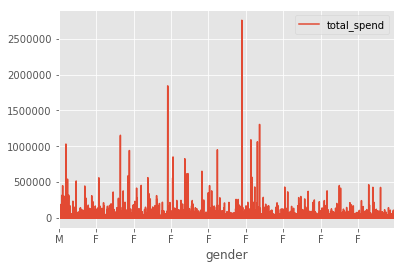

In [46]:
data.plot(y = 'total_spend', x = 'gender')

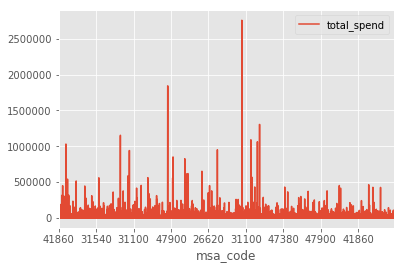

In [47]:
data.plot(y = 'total_spend', x = 'msa_code')

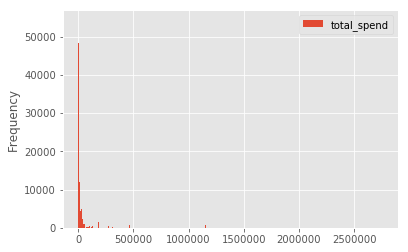

In [51]:
data.plot.hist(y = 'total_spend', bins = 10000)

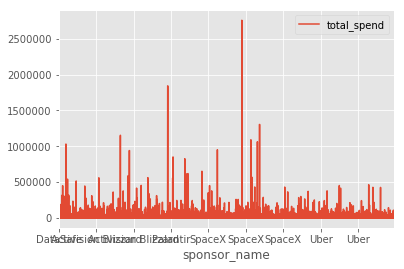

In [49]:
data.plot(y = 'total_spend', x = 'sponsor_name')